In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [4]:
# Cargar los datos originales
X = np.load('X.npy')
y = np.load('y.npy')

# Asegurar que y sea un vector unidimensional
y = y.flatten()

In [6]:
# Filtrar solo los datos de 0 y 1
mask = (y == 0) | (y == 1)  # Filtrar imágenes de solo 0 y 1
X_bin = X[mask]
y_bin = y[mask]

In [47]:
# Mezclar los datos antes de dividirlos
indices = np.arange(len(X_bin))
np.random.shuffle(indices)
X_bin, y_bin = X_bin[indices], y_bin[indices]

# Dividir los datos (80% entrenamiento, 20% prueba)
split_ratio = 0.8
split_index = int(len(X_bin) * split_ratio)

In [48]:
# Mezclar los datos antes de dividirlos
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X_shuffled = X[indices]
y_shuffled = y[indices]

In [49]:
X_train, X_test = X_bin[:split_index], X_bin[split_index:]
y_train, y_test = y_bin[:split_index], y_bin[split_index:]

# Confirmar nuevamente que solo hay 0 y 1 en y_train y y_test
print("Valores únicos en y_train:", np.unique(y_train))
print("Valores únicos en y_test:", np.unique(y_test))

Valores únicos en y_train: [0 1]
Valores únicos en y_test: [0 1]


In [50]:
#Normalizar imágenes (valores de 0-255 a 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0  

In [51]:
#Construir el modelo de red neuronal
model = keras.Sequential([
    keras.Input(shape=(400,)),
    keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
    keras.layers.Dense(64, activation='relu'),   # Otra capa oculta
    keras.layers.Dense(1, activation='sigmoid') # Capa de salida
])


In [52]:
# Verificar las etiquetas únicas
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))

# Asegurarse de que las etiquetas sean 0 o 1
y_train = (y_train == 1).astype(int)
y_test = (y_test == 1).astype(int)

# Compilar con binary_crossentropy
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))


Unique labels in y_train: [0 1]
Unique labels in y_test: [0 1]
Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5903 - loss: 0.6878 - val_accuracy: 0.9700 - val_loss: 0.6650
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9908 - loss: 0.6466 - val_accuracy: 0.9800 - val_loss: 0.5763
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9967 - loss: 0.5334 - val_accuracy: 0.9900 - val_loss: 0.4116
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9958 - loss: 0.3512 - val_accuracy: 0.9900 - val_loss: 0.2370
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9950 - loss: 0.1911 - val_accuracy: 0.9850 - val_loss: 0.1330
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9957 - loss: 0.1025 - val_accuracy: 0.9900 - val_loss: 0.0837
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9953 - loss: 0.0624 - val_accuracy: 0.9900 - val_loss: 0.0637
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/st

In [53]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n Precisión en el conjunto de prueba: {test_acc:.4f}")

#Hacer una predicción y mostrar una imagen con su predicción
predictions = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9924 - loss: 0.0210

 Precisión en el conjunto de prueba: 0.9900
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


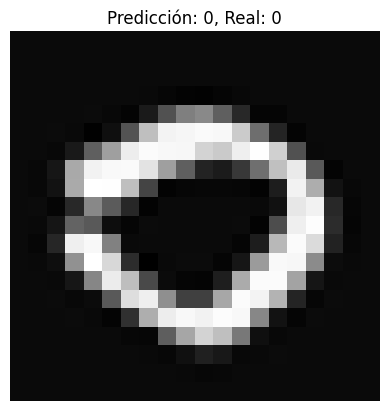

In [87]:
# Escoger una imagen aleatoria
index = np.random.randint(0, len(X_test))
image = X_test[index].reshape(20, 20)  # Ajustar el tamaño si es necesario

# Convertir la predicción a etiqueta binaria (0 o 1)
pred_label = 1 if predictions[index] >= 0.5 else 0

# Mostrar la imagen y su predicción
plt.imshow(image, cmap='gray')
plt.title(f"Predicción: {pred_label}, Real: {y_test[index]}")
plt.axis('off')
plt.show()